**Imports**

In [64]:
from collections import Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from yellowbrick.classifier import ClassificationReport

import numpy as np 
import pandas as pd

In [65]:
#Import the Dataset we are working with

In [66]:
data_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/processed/OneHot_MasterData5.csv'
data_df = pd.read_csv(data_url, sep = ',', engine = 'python', encoding = 'latin-1')

**Modeling**

In [67]:
data_df.head()

,raceId,driverId,constructorId,grid,position,positionOrder,laps,fastestLap,rank,fastestLapSpeed,...,trackType_CompletionStatus_1,nationality_CompletionStatus_1,bundled_circuitId_CompletionStatus_1,binned_circuits_CompletionStatus_1,positionText_CompletionStatus_2,country_CompletionStatus_2,trackType_CompletionStatus_2,nationality_CompletionStatus_2,bundled_circuitId_CompletionStatus_2,binned_circuits_CompletionStatus_2
0,1,1,1,18,NaN,20,58,39.0,13.0,214.455,...,0.287045,0.240838,0.250732,0.277588,0.000000,0.648188,0.712955,0.759162,0.749268,0.722412
1,1,2,2,9,10.0,10,58,48.0,5.0,216.245,...,0.287045,0.209566,0.250732,0.277588,0.968680,0.648188,0.712955,0.790434,0.749268,0.722412
2,1,3,3,5,6.0,6,58,48.0,1.0,217.668,...,0.287045,0.209566,0.250732,0.277588,0.997835,0.648188,0.712955,0.790434,0.749268,0.722412
3,1,4,4,10,5.0,5,58,53.0,9.0,215.199,...,0.287045,0.231140,0.250732,0.277588,0.997840,0.648188,0.712955,0.768860,0.749268,0.722412
4,1,6,3,11,NaN,18,17,6.0,18.0,212.301,...,0.287045,0.361371,0.250732,0.277588,0.002367,0.648188,0.712955,0.638629,0.749268,0.722412


In [68]:
data_df.shape

(9466, 35)

In [69]:
data_df.CompletionStatus.value_counts()

1    7108
0    2358
Name: CompletionStatus, dtype: int64

In [70]:
data_df.isna().sum()

raceId                                     0
driverId                                   0
constructorId                              0
grid                                       0
position                                2164
positionOrder                              0
laps                                       0
fastestLap                              2745
rank                                    2704
fastestLapSpeed                         2745
familyStatus                               0
CompletionStatus                           0
year                                       0
circuitId                                  0
alt                                        0
isHistoric                                 0
total_lap_time                             0
average_lap_time                           0
minimum_lap_time                           0
PRCP                                       0
TAVG                                       0
TMAX                                       0
TMIN      

In [71]:
#Position, fastest lap, rank, fastest lap speed all contain nulls. 
#This suggests that they would have high correlation to our target Completion Status. 
#These columns will be excluded from our feature selection. 

In [72]:
X = data_df[['grid',
       'alt',
        'average_lap_time',
       'minimum_lap_time', 'PRCP', 'TAVG', 'TMAX', 'TMIN',
       'country_CompletionStatus_1',
       'nationality_CompletionStatus_1',
       'bundled_circuitId_CompletionStatus_1',
       'binned_circuits_CompletionStatus_1',
       'country_CompletionStatus_2', 'nationality_CompletionStatus_2',
       'bundled_circuitId_CompletionStatus_2',
       'binned_circuits_CompletionStatus_2']]

In [73]:
y = data_df.CompletionStatus

In [74]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state = 3)

In [75]:
#Test our data on various estimators.

def score_model(X_train, y_train, estimator, **kwargs):
   
    model.fit(X_train, y_train, **kwargs)  
    
    expected  = y
    predicted = model.predict(X_train)
    
    # Compute and return F1
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    

# Instantiate the classification models
models = [
    SVC(gamma='auto'), 
    LinearSVC(),  
    KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), 
    LogisticRegressionCV(cv=3), 
    BaggingClassifier(), 
    ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X, y, model)

SVC: 1.0


/Users/jamesbifulco/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC: 0.8577289730903827
KNeighborsClassifier: 0.8911214038750082
LogisticRegression: 0.8586969660340869
LogisticRegressionCV: 0.8582139186166031
BaggingClassifier: 0.9936788874841972
ExtraTreesClassifier: 1.0
RandomForestClassifier: 1.0


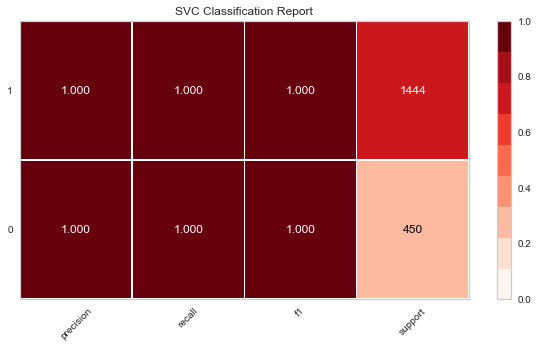

/Users/jamesbifulco/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


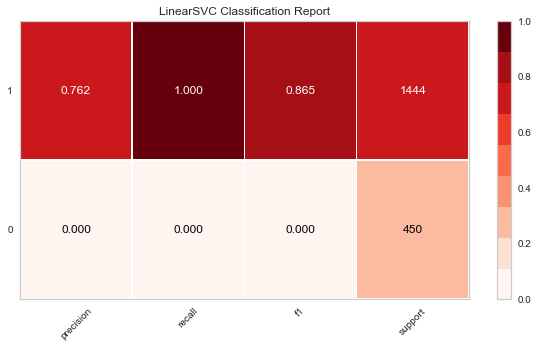

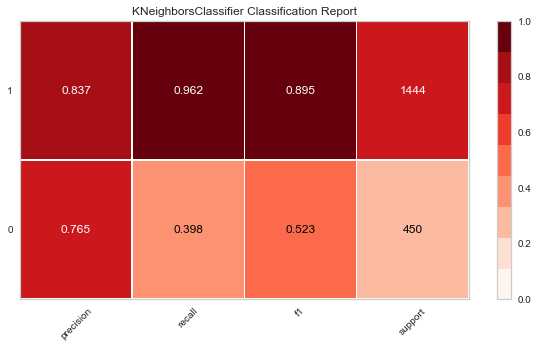

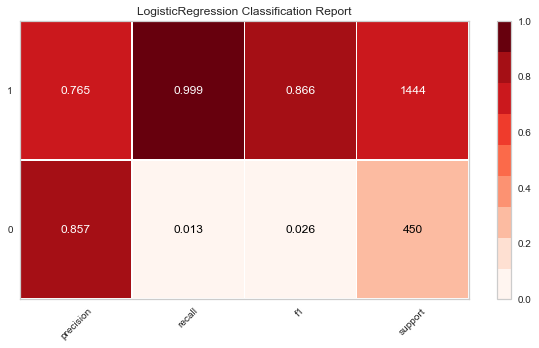

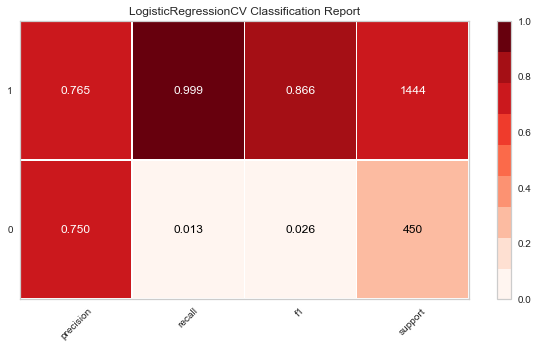

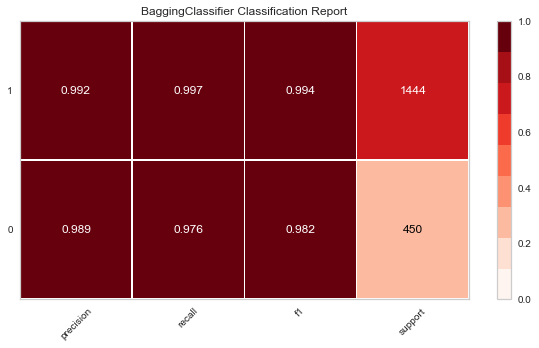

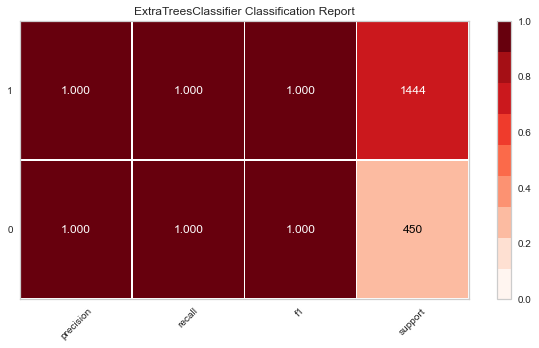

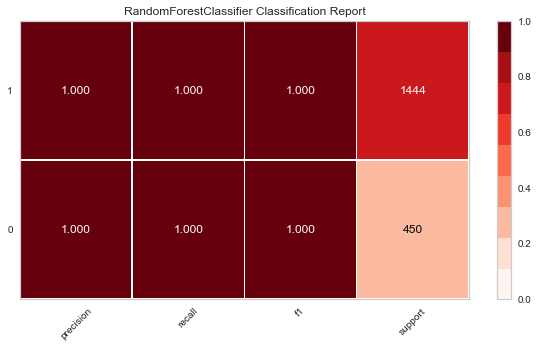

In [76]:
#Visualize our data on various estimators. 

def visualize_model(X, y, estimator):
   
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, 
        classes=[0,1], 
        cmap="Reds", 
        support=True,
        size=(600, 360)
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state = 3)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

for model in models:
    visualize_model(X, y, model)

In [77]:
#Based on the performance of these models, we can deduce that data leakage may be taking place due to class imbalance. 
#We will now address this issue to achieve greater model performance. 

**Logistic Regression**

In [82]:
#Model Evaluation with SMOTE, Min Max Scaler, and Stratified K-Fold Cross Validation

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)


pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.6599128871988835
Test score: 0.6569063028916066


In [84]:
#Alternate Method of Model Evaluation

In [94]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred)))

In [95]:
# our classifier to use
classifier = LogisticRegression

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [97]:
# build normal model
pipeline = make_pipeline(classifier(random_state=42))
model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)

In [98]:
# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

In [99]:
# print information about both models
print()
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))


normal data distribution: Counter({1: 7108, 0: 2358})
SMOTE data distribution: Counter({0: 7108, 1: 7108})


In [100]:
# classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.55      0.01      0.02       632
           1       0.73      1.00      0.85      1735

    accuracy                           0.73      2367
   macro avg       0.64      0.50      0.43      2367
weighted avg       0.68      0.73      0.62      2367



In [101]:
print(classification_report_imbalanced(y_test, smote_prediction))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.32      0.57      0.56      0.41      0.57      0.32       632
          1       0.78      0.56      0.57      0.65      0.57      0.32      1735

avg / total       0.66      0.56      0.57      0.59      0.57      0.32      2367



In [102]:
print()
print('normal Pipeline Score {}'.format(pipeline.score(X_test, y_test)))
print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))


normal Pipeline Score 0.7334178284748627
SMOTE Pipeline Score 0.5648500211237854


In [103]:
print()
print_results("normal classification", y_test, prediction)
print()
print_results("SMOTE classification", y_test, smote_prediction)


normal classification
accuracy: 0.7334178284748627
precision: 0.734295415959253
recall: 0.9971181556195965
f1: 0.8457589831337081

SMOTE classification
accuracy: 0.5648500211237854
precision: 0.7822257806244995
recall: 0.5631123919308357
f1: 0.6548257372654156


In [104]:
from sklearn.model_selection import KFold

In [105]:
kf = KFold(n_splits=12)
accuracy = []
precision = []
recall = []
f1 = []
auc = []

In [106]:
for train, test in kf.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), classifier(random_state=42))
    model = pipeline.fit(X_train, y_train)
    prediction = model.predict(X_train)
    accuracy.append(pipeline.score(X_train, y_train))
    precision.append(precision_score(y_train, prediction))
    recall.append(recall_score(y_train, prediction))
    f1.append(f1_score(y_train, prediction))
    auc.append(roc_auc_score(y_train, prediction))

print()
print("mean of scores 12-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))
print()



mean of scores 12-fold:
accuracy: 0.5611705874066769
precision: 0.7983129002876203
recall: 0.5612165767107141
f1: 0.656074561786158

